In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as pl

In [2]:
msft = yf.download('MSFT', start='2022-01-01', end='2022-12-31')

[*********************100%***********************]  1 of 1 completed


In [3]:
msft['Date'] = msft.index
msft['Date'] = pd.to_datetime(msft['Date'])
msft.set_index('Date', inplace=True)
msft = msft[['Close']]

In [7]:
msft = msft.copy()
msft['Close'] = scaler.fit_transform(np.array(msft['Close']).reshape(-1, 1))


In [9]:
import numpy as np

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        label = data[i + seq_length:i + seq_length + 1]
        sequences.append((seq, label))
    return np.array(sequences)


In [10]:
sequence_length = 10

In [12]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        label = data[i + seq_length:i + seq_length + 1]
        sequences.append((seq, label))
    return np.array(sequences, dtype=object)


In [13]:
X, y = zip(*sequences)
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2, random_state=42)

In [14]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [16]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
6/6 [==============================] - 4s 177ms/step - loss: 0.1785 - val_loss: 0.1490
Epoch 2/20
6/6 [==============================] - 0s 27ms/step - loss: 0.1300 - val_loss: 0.1017
Epoch 3/20
6/6 [==============================] - 0s 24ms/step - loss: 0.0835 - val_loss: 0.0537
Epoch 4/20
6/6 [==============================] - 0s 22ms/step - loss: 0.0374 - val_loss: 0.0167
Epoch 5/20
6/6 [==============================] - 0s 24ms/step - loss: 0.0142 - val_loss: 0.0077
Epoch 6/20
6/6 [==============================] - 0s 23ms/step - loss: 0.0144 - val_loss: 0.0099
Epoch 7/20
6/6 [==============================] - 0s 25ms/step - loss: 0.0109 - val_loss: 0.0056
Epoch 8/20
6/6 [==============================] - 0s 27ms/step - loss: 0.0086 - val_loss: 0.0072
Epoch 9/20
6/6 [==============================] - 0s 28ms/step - loss: 0.0088 - val_loss: 0.0060
Epoch 10/20
6/6 [==============================] - 0s 26ms/step - loss: 0.0074 - val_loss: 0.0049
Epoch 11/20
6/6 [===========

In [17]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

2/2 [==============================] - 0s 12ms/step


In [18]:
train_predict = scaler.inverse_transform(train_predict)
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))


In [19]:
train_rmse = np.sqrt(mean_squared_error(y_train_original, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_original, test_predict))
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 0.07387543584620128
Test RMSE: 0.0676667082033874


In [21]:
import matplotlib.pyplot as plt


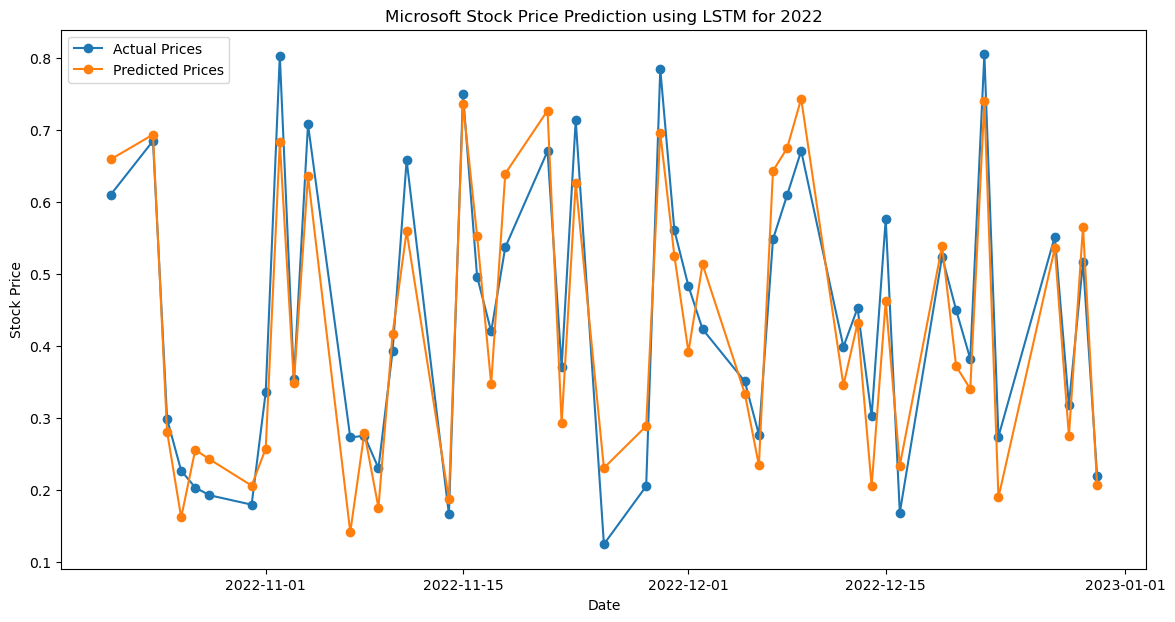

In [22]:
plt.figure(figsize=(14, 7))
plt.plot(msft.index[-len(y_test_original):], y_test_original, label='Actual Prices', marker='o')
plt.plot(msft.index[-len(y_test_original):], test_predict, label='Predicted Prices', marker='o')
plt.title('Microsoft Stock Price Prediction using LSTM for 2022')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()